In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matzim95/ML-datasets/master/iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
y = df['species']
X = df.drop(['species'], axis=1)

In [5]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
classes = y.unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Logaritmic Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

In [32]:
model = LogisticRegression(max_iter = 10000, solver='saga')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

<Axes: >

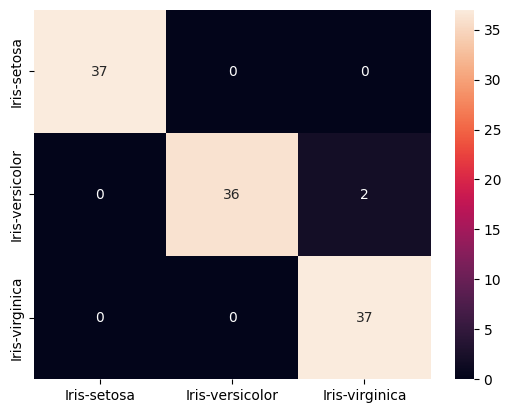

In [33]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, xticklabels=classes, yticklabels=classes, annot=True)

<Axes: >

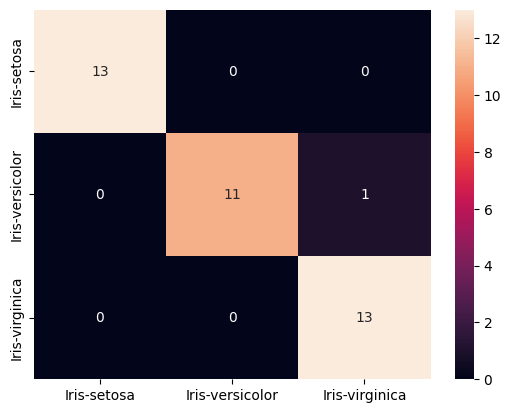

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt='d')

In [35]:
# average:
#   None - results for each class separately
#   'binary' - for the label selected in `pos_label`
#   'micro' - for the total number of TP, FN, FP
#   'macro' - unweighted average for each class
#   'weighted' - weighted average for each class

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.9821428571428571
Precision: 0.983058608058608
Recall: 0.9821428571428571
F1-Score: 0.9821365068075594


In [36]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='micro')
recall_test = recall_score(y_test, y_pred, average='micro')
f1_test = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.9736842105263158
Precision: 0.9736842105263158
Recall: 0.9736842105263158
F1-Score: 0.9736842105263158


In [37]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.982143
1,test,accuracy,0.973684
2,train,precision,0.983059
3,test,precision,0.973684
4,train,recall,0.982143
5,test,recall,0.973684
6,train,f1,0.982137
7,test,f1,0.973684


In [38]:
df

,accuracy,precision,recall,f1
train,0.982143,0.983059,0.982143,0.982137
test,0.973684,0.973684,0.973684,0.973684


<Axes: xlabel='metric', ylabel='value'>

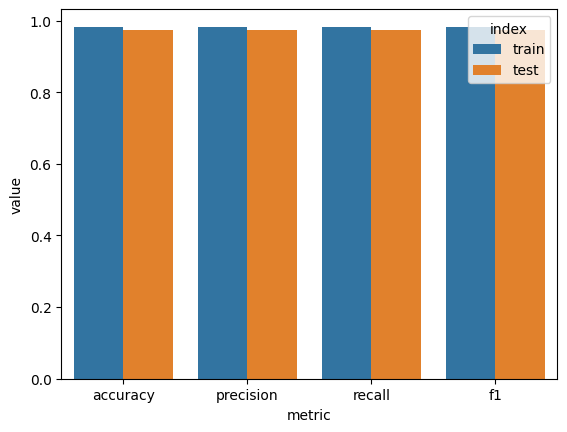

In [39]:
sns.barplot(x='metric', y='value', hue='index', data=melted)

### NaiveBias

In [16]:
# Gaussian NaiveBias

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

In [18]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print('f1_score_GaussianNB', f1_score(y_test, y_pred, average='weighted'))

f1_score_GaussianNB 0.973599457581151


<Axes: >

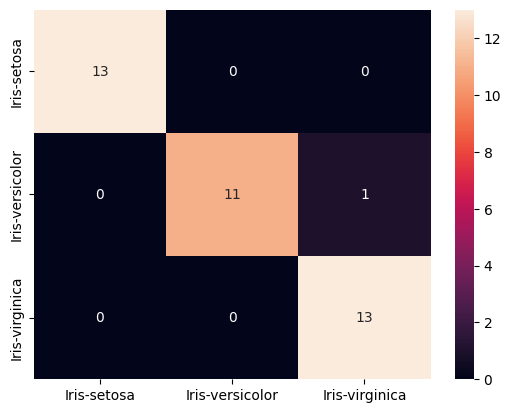

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt='d')

In [21]:
# Categorical NaiveBias

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

In [23]:
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: >

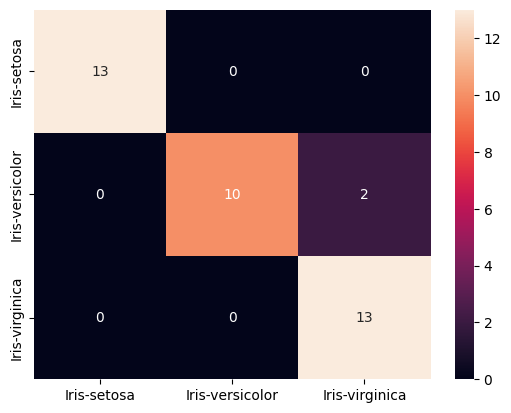

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt='d')

### Decision Tree

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

In [26]:
df_results = pd.DataFrame(columns = ['deepth','f1_train', 'f1_test'])

for i in range(1,100):
    dtr = DecisionTreeClassifier(max_depth = i)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    y_pred_train = dtr.predict(X_train)
    df_results.loc[len(df_results)] = [i,f1_score(y_pred_train , y_train, average = 'weighted'),f1_score(y_test, y_pred, average='weighted')]

In [27]:
print(df_results.sort_values(by='f1_test', ascending=False).head(5))

    deepth  f1_train   f1_test
49    50.0       1.0  0.973599
33    34.0       1.0  0.973599
35    36.0       1.0  0.973599
36    37.0       1.0  0.973599
76    77.0       1.0  0.973599


In [28]:
dtr_model = DecisionTreeClassifier(max_depth = 50)
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)

<Axes: >

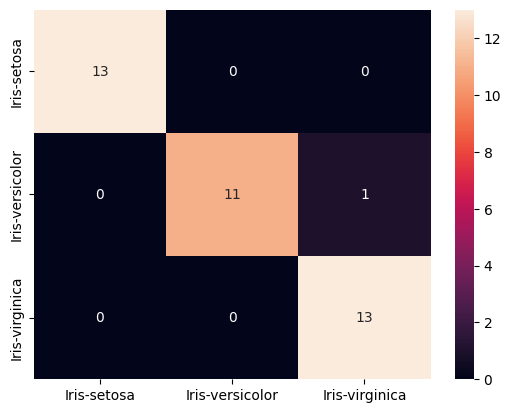

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt='d')

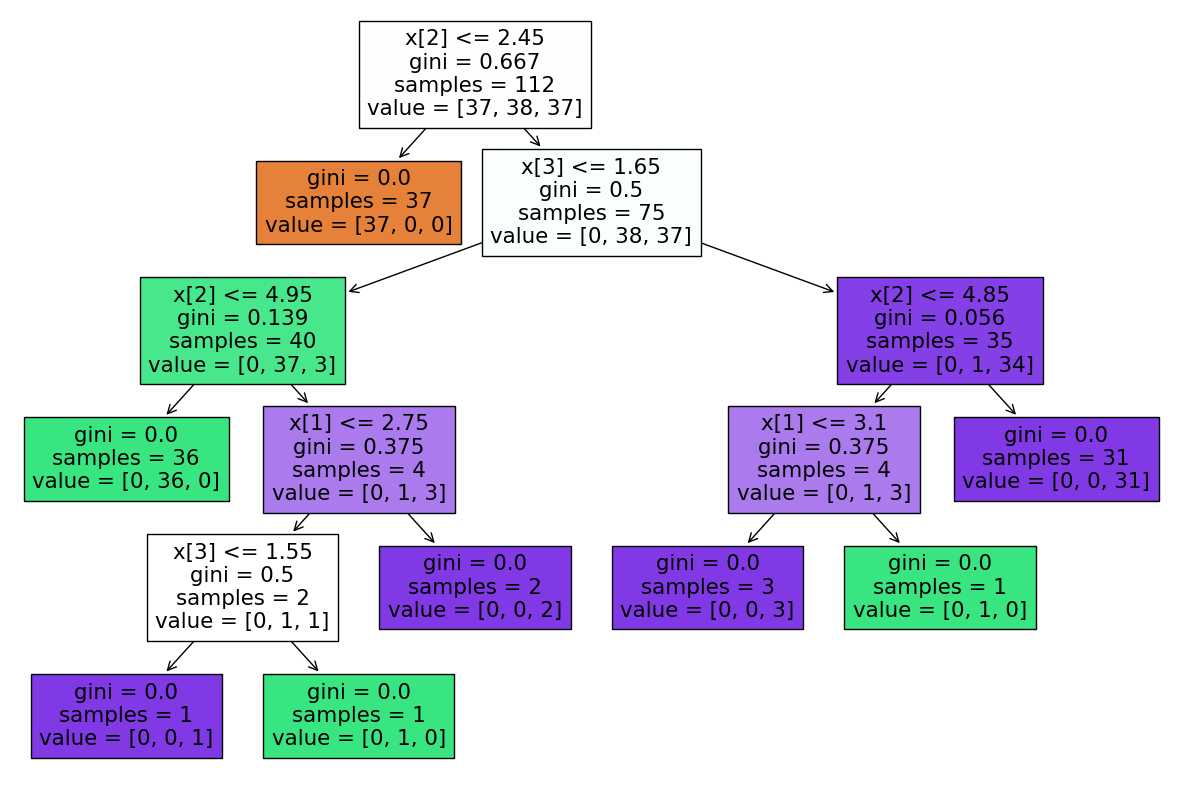

In [30]:
fig = plt.figure(figsize = (15,10))
_ = plot_tree(dtr_model, filled = True)